# Ayudantía ?

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert, ishermitian, hessenberg
from scipy.sparse.linalg import aslinearoperator
import pandas as pd
import time

# Page rank

In [26]:
#nombre del archivo
name = "gr0.California.txt"

#Leemos el archivo
df = pd.read_csv(name, delimiter=" ", header=None, names=["data_type", "origin", "end"])

display(df)

#Para identificar cuantas páginas web distintas tenemos
V = df.loc[df["data_type"]=="n"]
display(V)
N_pages = V.shape[0]

#E = edges
edges_df = df.loc[df["data_type"]=="e"][["origin", "end"]]
display(edges_df)

origin_array = np.array(edges_df["origin"])
end_array = np.array(edges_df["end"], dtype=int)

edges = np.dstack((origin_array, end_array))[0]
print(edges)

,data_type,origin,end
0,n,0,http://www.berkeley.edu/
1,n,1,http://www.caltech.edu/
2,n,2,http://www.realestatenet.com/
3,n,3,http://www.ucsb.edu/
4,n,4,http://www.washingtonpost.com/wp-srv/national/...
...,...,...,...
25809,e,9663,1806
25810,e,9663,266
25811,e,9663,7905
25812,e,9663,70


,data_type,origin,end
0,n,0,http://www.berkeley.edu/
1,n,1,http://www.caltech.edu/
2,n,2,http://www.realestatenet.com/
3,n,3,http://www.ucsb.edu/
4,n,4,http://www.washingtonpost.com/wp-srv/national/...
...,...,...,...
9659,n,9659,http://www.spd.louisville.edu/~mejenn01/handy....
9660,n,9660,http://www.maxwellstreet.org/
9661,n,9661,http://village.ios.com/~internet/
9662,n,9662,http://www.meats.net/


,origin,end
9664,0,449
9665,0,450
9666,0,451
9667,0,452
9668,0,453
...,...,...
25809,9663,1806
25810,9663,266
25811,9663,7905
25812,9663,70


[[   0  449]
 [   0  450]
 [   0  451]
 ...
 [9663 7905]
 [9663   70]
 [9663 7907]]


In [27]:
Lk = {i: (len(np.where(edges[:,0] == i)[0]),                                # Cantidad de nodos que salen de i
           edges[np.where(edges[:,1] == i)[0], 0]) for i in range(N_pages)} # Nodos de salida con camino a i
print(Lk[0])

(17, array([  22,   32,   81,  287,  340,  400,  402,  409,  411,  413,  416,
        424,  425,  426,  428,  429,  430,  431,  436,  437,  440,  441,
        445,  446,  448,  449,  453,  460,  464,  747,  748,  753,  849,
       1022, 1023, 1025, 1102, 1116, 1121, 1125, 1139, 1156, 1159, 1400,
       1468, 1469, 1471, 1473, 1476, 1484, 1653, 1868, 1905, 2124, 2529,
       2536, 2546, 2556, 2557, 2843, 2876, 3000, 3301, 3309, 3313, 3318,
       3324, 3327, 3344, 3346, 3348, 3584, 3965, 4234, 4237, 4241, 4248,
       4258, 4259, 4285, 4298, 4316, 4320, 4328, 4338, 4867, 5503, 5642,
       5686, 5688, 5980, 6099, 6122, 6342, 6348, 6350, 6528, 6808, 6818,
       7439, 7589, 7590, 7593, 7599, 7601, 7607, 7609, 7616, 7858, 7859,
       7861, 7862, 7869, 7873, 7874, 7899, 8010, 8020, 8040, 8237, 8469,
       8712, 9125, 9645, 9648, 9654], dtype=int64))


# Matriz A

In [28]:
def Matrix(Lk, mod=False, alpha=0.85):
    
    N = len(Lk.keys())
    A = np.zeros((N, N), dtype=float)
    
    for i, (ni, List) in Lk.items():
        for j in List:
            nj, _ = Lk[j]
            A[i, j] = 1.0/float(nj)
    
    if mod:
        plt.spy(A, markersize=0.1)
    else:
        plt.spy(A)
    plt.title("Matriz original")
    plt.show()
    
    e = np.ones(N, dtype=float)
    v = np.copy(e)/N  #vector de probabilidades (entradas >=0 que suman 1)
    a = np.zeros(N, dtype=float)

    if mod:
        for i, (ni, _) in Lk.items():
            if ni == 0:
                a[i] = 1
    
        A1 = A + np.outer(v, a)
        A2 = alpha*A1 + (1-alpha)*np.outer(v, e)
        return A2
    return A

# Sanity Check

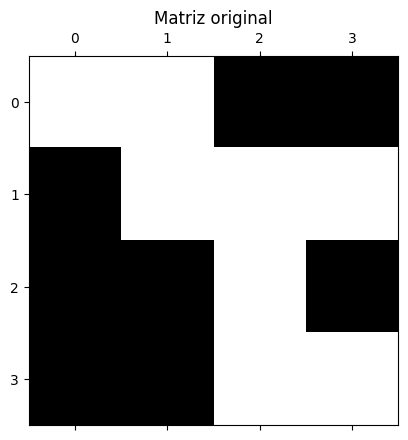

True! La página 9 no tiene links salientes :c


In [29]:
test_edges = np.array([[0, 1],
                       [0, 2],
                       [0, 3],
                       [1, 2],
                       [1, 3],
                       [2, 0],
                       [3, 0],
                       [3, 2]])

Ntest = 4

test_Lk = {i: (len(np.where(test_edges[:,0] == i)[0]),                                # Cantidad de nodos que salen de i
           test_edges[np.where(test_edges[:,1] == i)[0], 0]) for i in range(Ntest)}

Matrix(test_Lk, mod=False, alpha=0)
# pags sin links salientes
for i, (ni, _) in Lk.items():
    if ni == 0:
        print(f"{ni == 0}! La página {i} no tiene links salientes :c")
        break

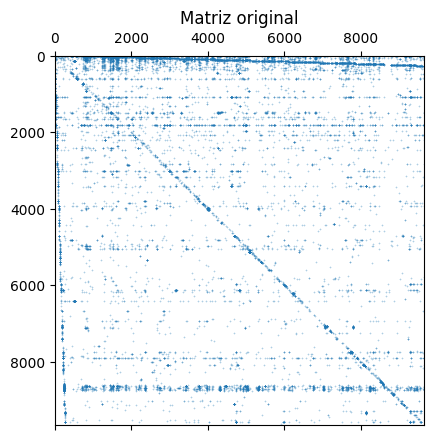

In [30]:
A = Matrix(Lk, mod=True)

Evaluando método con alpha=0.9


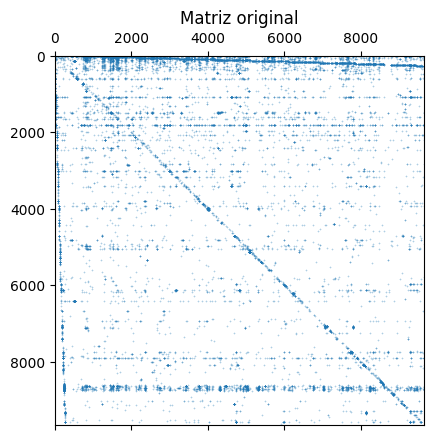

El mayor valor propio es: 0.9999999999999992
Se demoró un tiempo de 18.78 segundos en hacer 299 iteraciones
--------------------------------------------------
Evaluando método con alpha=0.85


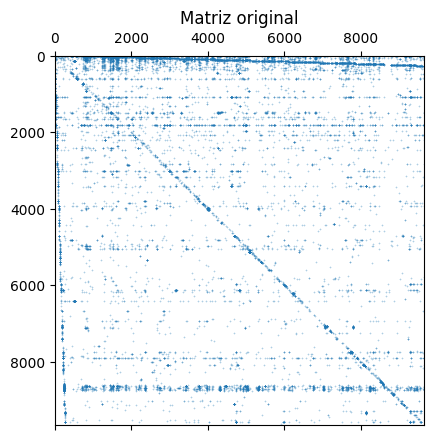

El mayor valor propio es: 1.000000000000001
Se demoró un tiempo de 12.40 segundos en hacer 198 iteraciones
--------------------------------------------------
Evaluando método con alpha=0.8


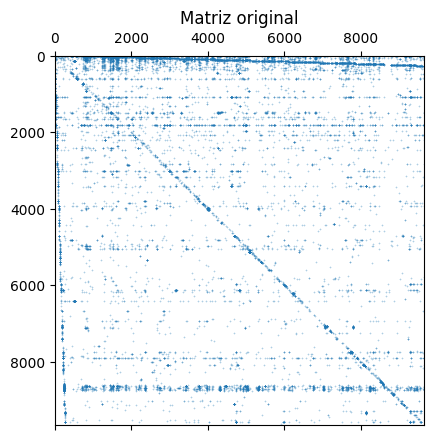

El mayor valor propio es: 0.9999999999999986
Se demoró un tiempo de 9.02 segundos en hacer 144 iteraciones
--------------------------------------------------
Evaluando método con alpha=0.75


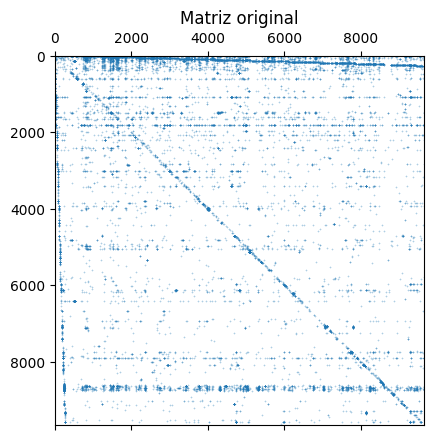

El mayor valor propio es: 1.0000000000000016
Se demoró un tiempo de 7.23 segundos en hacer 115 iteraciones
--------------------------------------------------
Evaluando método con alpha=0.7


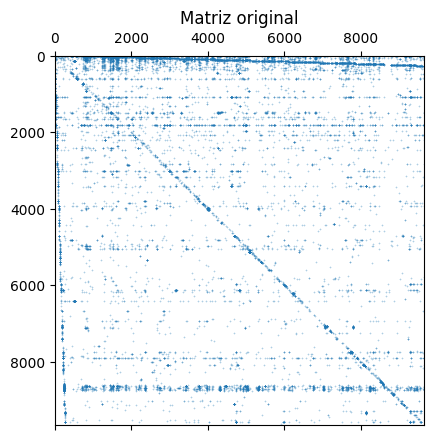

El mayor valor propio es: 1.0000000000000027
Se demoró un tiempo de 5.84 segundos en hacer 92 iteraciones
--------------------------------------------------
Evaluando método con alpha=0.65


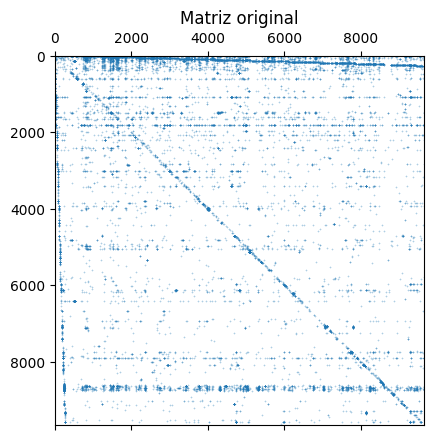

El mayor valor propio es: 0.9999999999999962
Se demoró un tiempo de 5.12 segundos en hacer 81 iteraciones
--------------------------------------------------


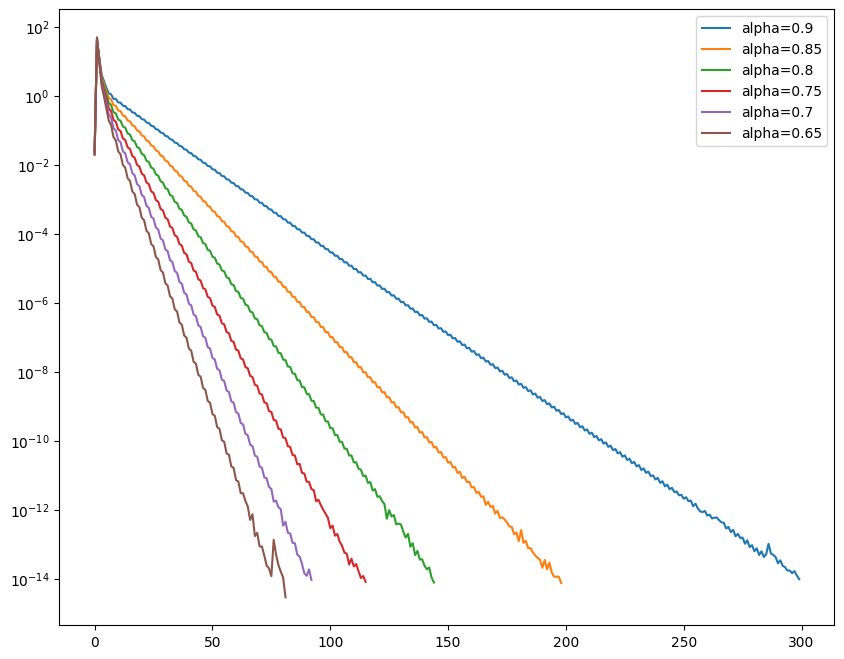

In [31]:
def potencia(A, tol=1e-8):
    """
    Input: A cuadrada
    Output: valor propio mayor
    """
    t1 = time.time()
    m, n = A.shape
    LO = aslinearoperator(A)
    
    x = (1/n)*np.ones(n, dtype=float)
    gamma = 0
    
    e_list = []
    error = np.linalg.norm(LO.matvec(x) - gamma*x)
    e_list.append(error)
    i = 0
    
    while error > tol:
        
        # Aproximación de vector propio (spdg, unitario)
        y = LO.matvec(x)
        y = y/np.linalg.norm(y)
        
        #Aproximación del valor propio
        gamma = np.dot(y, LO.matvec(y))
        
        #Cambiamos la condición de parada para el problema
        error = np.linalg.norm(x-y, ord=1)
        e_list.append(error)
        
        #actualizacion para siguiente iteración
        x = y
        i += 1
        
    t2 = time.time()
    print(f"El mayor valor propio es: {gamma}")
    print(f"Se demoró un tiempo de {t2-t1:.2f} segundos en hacer {i} iteraciones")
    return x/np.linalg.norm(x, ord=1), e_list
alpha_list = [0.9, 0.85, 0.8, 0.75, 0.7, 0.65]
error_list_list = []
scores_list = []

for alph in alpha_list:
    print(f"Evaluando método con alpha={alph}")
    A = Matrix(Lk, mod=True, alpha=alph)
    scores, e_list = potencia(A, tol=1e-14)
    scores_list.append(scores)
    error_list_list.append(e_list)
    print(50*"-")
plt.figure(figsize=(10, 8))
for i, e_list in enumerate(error_list_list):
    plt.plot(e_list, label=f"alpha={alpha_list[i]}")
    plt.yscale("log")

plt.legend(loc="best")
plt.show()

In [32]:
#Trabajamos con alpha=0.85
scores = scores_list[1]

#Mascara que ordena los scores en orden descendente
sort_mask = np.argsort(scores)[::-1]

#Scores ordenados en orden descendente
sorted_scores = scores[sort_mask]
print(f"Los mejores 3 scores son: {sorted_scores[:3]}")
print("10 páginas con mejor score: ")
display(V["end"].loc[V["origin"][sort_mask[:10]]])

Los mejores 3 scores son: [0.00623135 0.00608484 0.00477297]
10 páginas con mejor score: 


1488                              http://www.ucdavis.edu/
4391                           http://search.ucdavis.edu/
66                             http://www.california.edu/
6427    http://home.netscape.com/comprod/mirror/index....
4823                              http://www.berkeley.edu
2078                         http://www.linkexchange.com/
0                                http://www.berkeley.edu/
1489                                  http://www.uci.edu/
1617                                    http://www.ca.gov
2408                              http://www.lib.uci.edu/
Name: end, dtype: object

In [33]:
for i in sort_mask[:10]:
    print(i)
    print(f"Nodos alcanzables desde página {i}: ", edges[np.where(edges[:,0] == i)[0], 1])
    print(f"Nodos que llegan a página {i}: ", Lk[i][1])
    print("-"*100)

1488
Nodos alcanzables desde página 1488:  [4391]
Nodos que llegan a página 1488:  [  32  393 1025 1400 1447 1454 1467 1469 1471 1473 1480 1605 1653 2124
 2355 2407 2529 2546 2557 3000 3071 3301 3598 4248 4258 4261 4302 4312
 4324 4345 4346 4348 4351 4354 4355 4359 4360 4361 4363 4379 4391 4438
 4460 5255 5503 5519 5686 5719 5764 6275 6528 6630 6653 6808 6818 6911
 7657 7858 8237]
----------------------------------------------------------------------------------------------------
4391
Nodos alcanzables desde página 4391:  [1488]
Nodos que llegan a página 4391:  [ 109 1488 4345 4347 4361 5804]
----------------------------------------------------------------------------------------------------
66
Nodos alcanzables desde página 66:  [2769 2816 2817 2818 2819 2820 2821 2822 2824 2825 2826 2827 2829]
Nodos que llegan a página 66:  [  41  111  604 1079 1455 1617 2769 2772 2775 2776 2778 2780 2781 2783
 2784 2785 2786 2787 2790 2792 2796 2802 2803 2805 2808 2809 2814 2815
 2816 2817 5563 8469

### SVD con algoritmos de valores propios

La descomposición SVD de $A$ tiene relación con la descomposición espectral de $A^*A$. En este sentido:

$$A^*A = P\Lambda P^* = V(\Sigma^*\Sigma)V^* = (V\Sigma^*U^*)(U\Sigma V^*)$$

Entonces, podemos calcular la descomposición SVD de $A$ calculando los valores propios de $A^*A$ de la siguiente forma:

1. Calcular $A^*A = V\Lambda V^*$
2. $\Sigma = +\sqrt{\Lambda}$ (componente a componente)
3. Resolver $U\Sigma = AV$ para alguna matriz $U$ unitaria.

Asumimos que $A$ es cuadrada. Existe una forma de encontrar su descomposición SVD de forma estable usando los valores propios, al contrario del procedimiento anterior que es inestable. Para esto, aplicamos los siguientes pasos a $A$:

- Bidiagonalización $B = Q^TAR$ donde $B$ es bidiagonal, y $Q^T, R$ se obtienen con reflectores de Householder.
- Armar:
$$H = \begin{bmatrix}0&B^*\\B&0\end{bmatrix}$$
- Resolver el problema de valores y vectores propios para la matriz $H$.

In [34]:
def form_H(A):
    m, n = A.shape
    H = np.zeros((m+n, m+n), dtype=float)
    H[:n, n:] = A.conj().T
    H[n:, :n] = A
    return H

def signo(x):
    if x >= 0:
        return 1
    return -1


def bidiagonalization(A):
    """
    Golub-Kahan Bidiagonalization
    Input: A matriz cuadrada
    Output:
            - B bidiagonal
            - QT unitaria
            - R unitaria
    tal que A = QT@B@R
    """
    
    m, n = A.shape
    B = np.copy(A)
    QT = np.identity(n, dtype=float)
    R = np.identity(n, dtype=float)
    
    for k in range(n):
        
        # Cambios en columna
        x = B[k:, k]
        Lx = x.shape[0]
        
        # v de la proyección householder
        v = x + signo(x[0])*np.linalg.norm(x, ord=2)*np.eye(1, M=Lx)[0]
        v = v/np.linalg.norm(v, ord=2)
        
        Pk = np.eye(Lx) - 2*np.outer(v, v)
        B[k:, k:] = Pk@B[k:, k:]
        
        P = np.eye(n)
        P[k:, k:] = Pk
        QT = QT@P
        
        if k < n-1:
            
            y = B[k, k+1:]
            Ly = y.shape[0]
            
            v = y + signo(y[0])*np.linalg.norm(y, ord=2)*np.eye(1, M=Ly)[0]
            v = v/np.linalg.norm(v, ord=2)
            
            Pk = np.eye(Ly) - 2*np.outer(v, v)
            
            B[k:, k+1:] = B[k:, k+1:]@Pk
            P = np.eye(n)
            P[k+1:, k+1:] = Pk
            R = P@R
        
    return QT, B, R

¿Quienes son entonces las matrices $U, \Sigma, V^T$ de la descomposición SVD de $B$? Tenemos que si $B=U_B\Sigma_B V_B^*$, entonces:

$$\begin{bmatrix}&B^*\\B&\end{bmatrix}\begin{bmatrix}V_B&V_B\\U_B&-U_B\end{bmatrix}=\begin{bmatrix}V_B&V_B\\U_B&-U_B\end{bmatrix}\begin{bmatrix}\Sigma_B&\\&-\Sigma_B\end{bmatrix}$$

Es decir, la matriz con $U_B$ y $V_B$ son los vectores propios de $H$, y la matriz con $\Sigma$'s son los valores propios de $H$.

In [35]:
def get_shift(A_in):
    an = A_in[-2:,-2:].copy()
    eigs = np.linalg.eigvals(an)
    eigelect = np.abs(eigs - an[-1,-1])
    index = eigelect.argmin()
    eigelect = eigs[index]
    return eigelect
def QR_iter_shift(A, iteraciones):
    A_in = A.copy()
    kth = []
    Q = np.eye(len(A_in))
    for k in range(1, iteraciones + 1):
        N = len(A_in)
        I = np.identity(N)   
        shift = get_shift(A_in)
        Q_k, R_k = np.linalg.qr(A_in - shift*I)
        A_in = R_k@Q_k + shift*I
        kth.append(np.diag(A_in))
        Q = Q@Q_k
    return [np.diag(A_in), kth, Q]

In [36]:
def obtain_SVD(A):
    """
    B tiene mismos valores propios que A
    Input: A cuadrada
    Output: matrices U, S, VT tal que A = U*S@VT
    """
    QT, B, R = bidiagonalization(A)
    H = form_H(B)
    m, n = H.shape
    k = int(n/2)
    # Valores propios y vectores propios de H
    # Pueden obtenerse por otros algoritmos (Ejemplo: QR, aquí se intenta pero para el ejemplo no se logra :C)
    print(np.round(H, 2))
    
    # # H a tridiagonal Htri
    P = np.eye(n)
    perm_array = np.array([(i, i+k) for i in range(k)]).flatten()
    
    P[:, np.arange(n)] = P[:, perm_array]
    Htri = P.T@H@P
    print(Htri)
    
    
    vals, acumulado, vecs = QR_iter_shift(Htri, 7000)
    #vals, vecs = np.linalg.eig(Htri)
    
    #Indices para ordenar
    sorted_indexes = np.argsort(vals)[::-1]
    sorted_indexes[k:] = sorted_indexes[k:][::-1]
    
    # print(vals)
    # print(sorted_indexes)
    
    #Ordenamiento
    vals = vals[sorted_indexes].real
    # print(vals)
    vecs = vecs[:, sorted_indexes].real
    
    # Armamos UB, VB, SB
    VB = np.sqrt(2)*vecs[:k, :k] #Necesitamos que sean unitarias
    UB = np.sqrt(2)*vecs[k:, :k] #Necesitamos que sean unitarias
    SB = vals[:k]
    

    # print("B: ")
    # print(np.round(B, 2))
    # print("Producto SVD de B: ")
    # print(np.round(UB*SB@VB.conj().T, 2))
    
    U = QT@UB
    VT = VB.conj().T@R
    Sigma = SB
    return U, Sigma, VT

In [37]:
test = np.random.rand(30,30)
U, sigma, Vt = obtain_SVD(test)
a = np.sort(sigma)
nump = np.linalg.svd(test)
b= np.sort(nump[1])
print("Is it close?")
print(np.allclose(a,b))
print(np.linalg.norm(a-b))

[[ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ...  0. -0.  0.]
 [ 0.  0.  0. ... -0.  0.  0.]
 ...
 [-0.  0. -0. ...  0.  0.  0.]
 [-0. -0.  0. ...  0.  0.  0.]
 [-0.  0.  0. ...  0.  0.  0.]]
[[ 0.00000000e+00 -3.12648612e+00  0.00000000e+00 ... -1.63735145e-16
   0.00000000e+00 -1.76099710e-16]
 [-3.12648612e+00  0.00000000e+00  1.27071101e+01 ...  0.00000000e+00
   6.29127297e-16  0.00000000e+00]
 [ 0.00000000e+00  1.27071101e+01  0.00000000e+00 ... -5.77080093e-17
   0.00000000e+00  2.22044605e-16]
 ...
 [-1.63735145e-16  0.00000000e+00 -5.77080093e-17 ...  0.00000000e+00
  -1.12490826e-01  0.00000000e+00]
 [ 0.00000000e+00  6.29127297e-16  0.00000000e+00 ... -1.12490826e-01
   0.00000000e+00 -9.94494701e-02]
 [-1.76099710e-16  0.00000000e+00  2.22044605e-16 ...  0.00000000e+00
  -9.94494701e-02  0.00000000e+00]]
Is it close?
False
0.00017534787772555127
